#**K**-**Means** **Clustering** **Algorithm**.





In [11]:
#K-means clustering is one of the simplest unsupervised machine learning algorithms. 
#Here, we’ll explore what it can do and work through a simple implementation in Python.


#Let’s implement k-means clustering using a famous dataset: the Iris dataset.
#This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant.
#The dataset has four features: sepal length, sepal width, petal length, and petal width. 
#The fifth column is for species, which holds the value for these types of plants.For example, one of the types is a setosa.

#To start Python coding for k-means clustering, let’s start by importing the required libraries.
#Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster and seaborn library for dataset, as shown below.


#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [12]:
#To get the names all all datasets present in sns.

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [13]:
#We’re loading the Iris dataset and storing the data in a data frame df.
#After populating the data frame df, we use the head() method on the dataset to see its first 10 records.


df = sns.load_dataset("iris")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [14]:
#Now we select all four features (sepal length, sepal width, petal length, and petal width) of the
#dataset in a variable called x so that we can train our model with these features. 
#For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

x = df.iloc[:, [0,1,2,3]].values

In [15]:
#To start, let’s arbitrarily assign the value of k as 5. 
#We will implement k-means clustering using k=5. 
#For this we will instantiate the KMeans class and assign it to the variable kmeans5:
#Below, you can see the output of the k-means clustering model with k=5.

kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 4 2 0 4 4 0 3 0 4 0 4
 4 4 2 4 4 4 0 0 2 4 2 0 2 4 0 2 2 4 0 0 0 4 2 2 0 4 4 2 4 4 4 2 4 4 4 2 4
 4 2]


In [16]:
#Note that we can find the centers of 5 clusters formed from the data:

kmeans5.cluster_centers_

array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.22972973, 2.85135135, 4.76756757, 1.57297297],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

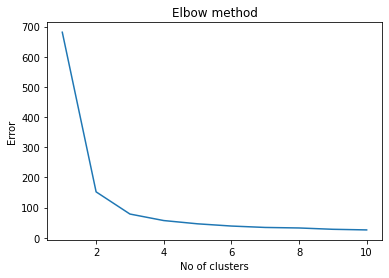

In [17]:
#There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. 
#So let’s use this method to calculate the optimum value of k. 
#To implement the Elbow method, we need to create some Python code (shown below),
#and we’ll plot a graph between the number of clusters and the corresponding error value.
#This graph generally ends up shaped like an elbow.

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

#The output graph of the Elbow method is shown below. 
#Note that the shape of elbow is approximately formed at k=3.

In [18]:
#As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
#Let’s implement k-means again using k=3

kmeans3 = KMeans(n_clusters = 3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [19]:
kmeans3.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

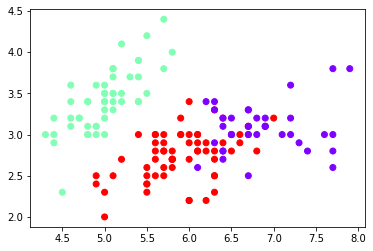

In [20]:
#Finally, its time to visualize the three clusters that were formed with the optimal k value. 
#You can clearly see three clusters in the image below, with each cluster represented by a different color.

plt.scatter(x[:,0],x[:,1],c = y_kmeans3, cmap = 'rainbow')